In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

In [19]:
% matplotlib inline

UsageError: Line magic function `%` not found.


In [ ]:
#loading data
crs_data = pd.read_csv("crs_data.csv")

In [ ]:
#understanding variables
crs_data.head()

,donor_code,donor_name,recipient_code,recipient_name,sector_code,sector_name,measure_code,measure_name,channel_code,channel_name,...,drr,nutrition,disability,biodiversity,climate_mitigation,climate_adaptation,desertification,amount_tied,amount_untied,nature_of_submission
0,1628.0,Wellcome Trust,665,Pakistan,12182,Medical research,30,Private Development Finance,50000,"Teaching institutions, research institutes or ...",...,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,8.0
1,1628.0,Wellcome Trust,665,Pakistan,12182,Medical research,30,Private Development Finance,50000,"Teaching institutions, research institutes or ...",...,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,8.0
2,1628.0,Wellcome Trust,665,Pakistan,12182,Medical research,30,Private Development Finance,50000,"Teaching institutions, research institutes or ...",...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,8.0
3,1628.0,Wellcome Trust,665,Pakistan,12182,Medical research,30,Private Development Finance,50000,"Teaching institutions, research institutes or ...",...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,8.0
4,1628.0,Wellcome Trust,665,Pakistan,12220,Basic health care,30,Private Development Finance,50000,"Teaching institutions, research institutes or ...",...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,8.0


In [ ]:
crs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87685 entries, 0 to 87684
Data columns (total 55 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   donor_code             87667 non-null  float64
 1   donor_name             87685 non-null  object 
 2   recipient_code         87685 non-null  int64  
 3   recipient_name         87685 non-null  object 
 4   sector_code            87685 non-null  int64  
 5   sector_name            87685 non-null  object 
 6   measure_code           87685 non-null  int64  
 7   measure_name           87685 non-null  object 
 8   channel_code           87685 non-null  int64  
 9   channel_name           87685 non-null  object 
 10  flow_code              87685 non-null  object 
 11  flow_name              87685 non-null  object 
 12  flow_type_code         87685 non-null  object 
 13  flow_type_name         87685 non-null  object 
 14  data_type_code         87685 non-null  object 
 15  am

In [ ]:
crs_grouped = crs_data.groupby(['year','donor_name'], as_index=False)['value'].sum()
crs_grouped.head()

,year,donor_name,value
0,2002,Australia,5.103243
1,2002,Austria,1.885123
2,2002,Belgium,1.841848
3,2002,Canada,21.638231
4,2002,Finland,1.220490


#### EXPLORING VISUALISATIONS WITH MATPLOTLIB #####

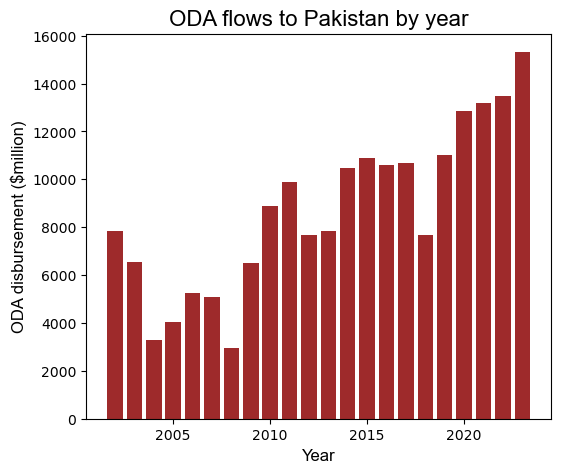

In [ ]:
# Create our figure and our axes
figure, axes = plt.subplots(figsize=(6, 5))

# Plot the Data
axes.bar(x=crs_grouped["year"], height=crs_grouped["value"],
             color="#9E2A2B")  # NEW - Colour specified using HEX code

# Add Labels and titles
axes.set_title("ODA flows to Pakistan by year", 
               fontname="Arial", 
               size=16)
axes.set_xlabel("Year", fontname="Arial", size=12)
axes.set_ylabel("ODA disbursement ($million)", fontname="Arial", size=12);

In [ ]:
grouped = crs_data.groupby(['year', 'donor_name'], as_index=False)['value'].sum()

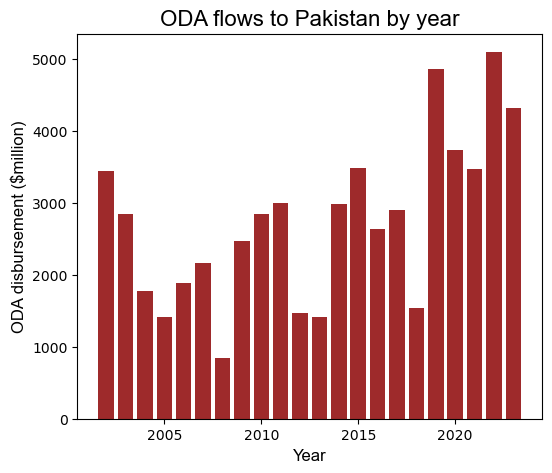

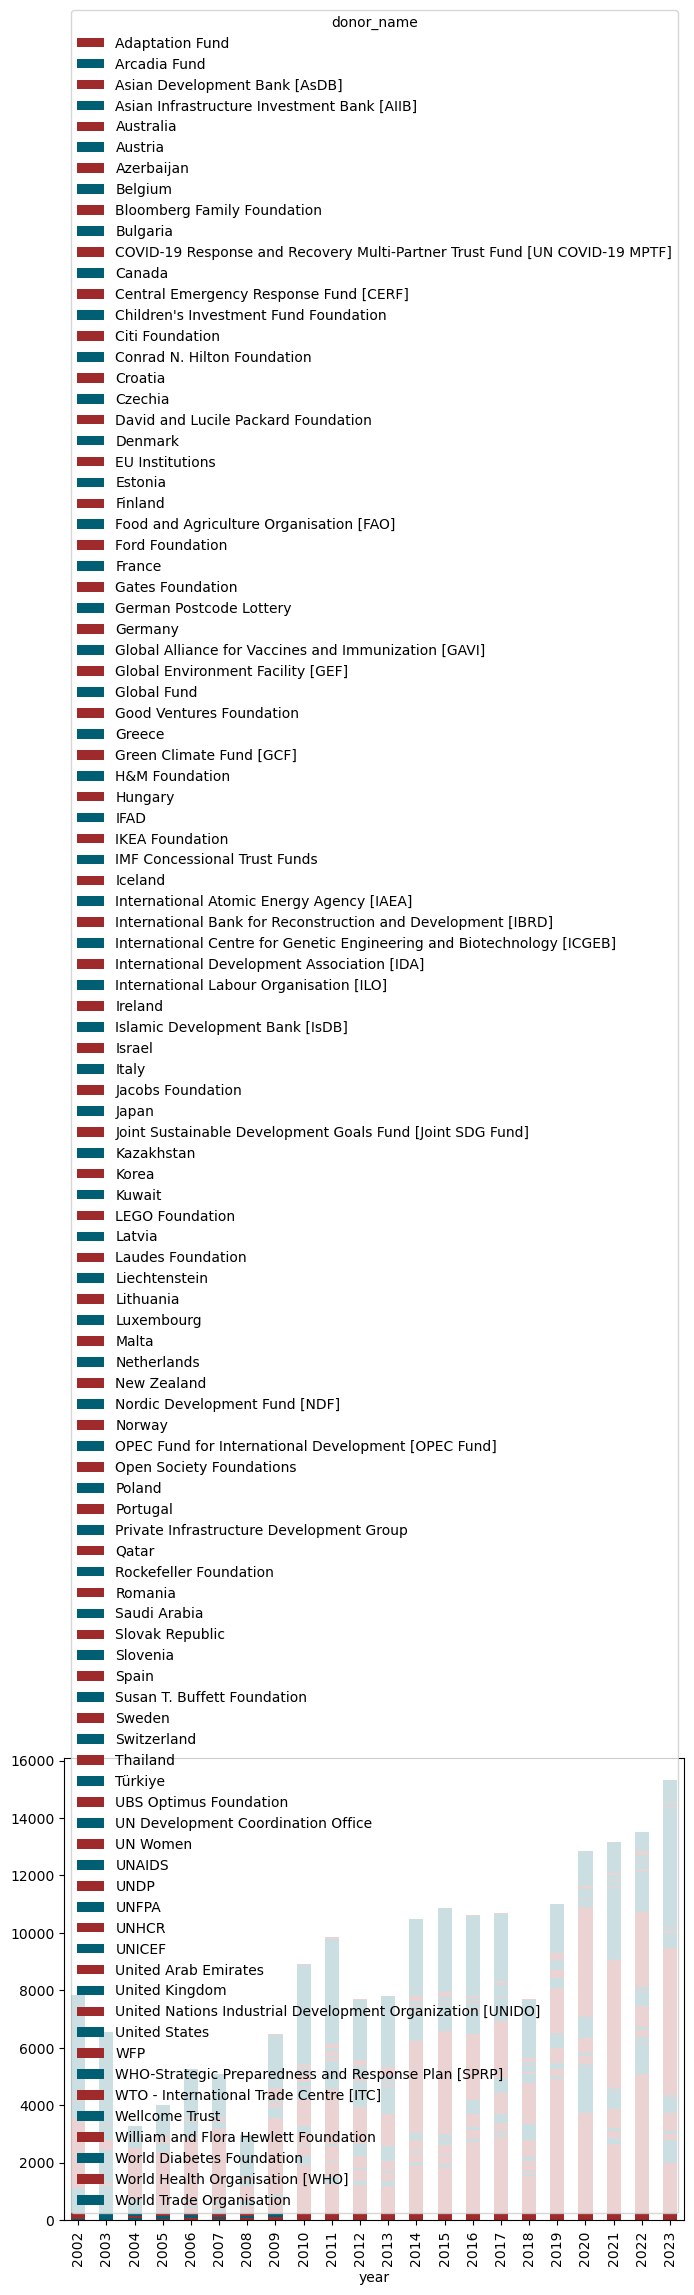

In [ ]:
# Create our figure and our axes
figure, axes = plt.subplots(figsize=(6, 5))

# Plot the Data
axes.bar(x=crs_grouped["year"], height=crs_grouped["value"],
             color="#9E2A2B")  # NEW - Colour specified using HEX code

#Pivot data to wide format
pivoted = grouped.pivot(index='year', columns='donor_name', values='value').fillna(0)

#Create stacked bar chart
pivoted.plot(kind='bar', stacked=True, figsize=(8,6), color=["#9E2A2B", "#005F73"])


# Add Labels and titles
axes.set_title("ODA flows to Pakistan by year", 
               fontname="Arial", 
               size=16)
axes.set_xlabel("Year", fontname="Arial", size=12)
axes.set_ylabel("ODA disbursement ($million)", fontname="Arial", size=12);

#### EXPLORING VISUALISATIONS WITH PLOTLY EXPRESS - TESTING IF BETTER #### 

In [25]:
fig = px.bar(
    crs_grouped,
    x="year",
    y="value",
    color="donor_name",   # This separates the stacks by donor
    text_auto=True,       # Optional: shows values on bars
    title="ODA flows to Pakistan by year and donor",
    labels={
        "year": "Year",
        "value": "ODA disbursement ($million)",
        "donor_name": "Donor Name"
    },
    color_discrete_sequence=px.colors.qualitative.Safe  # Optional: choose nice colors
)

# Customize the layout a bit
fig.update_layout(
    barmode="stack",  # Stack the bars
    title_font=dict(family="Arial", size=16),
    xaxis_title_font=dict(family="Arial", size=12),
    yaxis_title_font=dict(family="Arial", size=12),
    legend_title="Donor",
    template="plotly_white"
)

fig.show()

### definitely need to recategorise donor names, grouping roughly as follows:
# multilaterals: ADB, WB(IDA & IBRD), UN agencies, EU institution
# bilterals: USA, UK, France, Germany, Australia, Japan, Saudi, 'other'

### TRYING PLOTLY.GRAPH_OBJECTS - WHICH IS MORE CUSTOMISABLE THAN EXPRESS

In [26]:
# Create a bar chart using Plotly
fig = go.Figure(data=[go.Bar(
    x=crs_grouped["year"],  # x-axis
    y=crs_grouped["value"],  # y-axis
    marker_color="#9E2A2B"    # Color specified using HEX code
)])

# Add titles and labels
fig.update_layout(
    title="ODA flows to Pakistan by year",
    title_font=dict(family="Arial", size=16),
    xaxis_title="Year",
    xaxis_title_font=dict(family="Arial", size=12),
    yaxis_title="ODA disbursement ($million)",
    yaxis_title_font=dict(family="Arial", size=12)
)

# Show the figure
fig.show()


next steps - categorise these donors in groups, so graph is much digestible